In [1]:
import os, sys, time 

# Import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## Récupération des données

SELECT TOP(50000) Id, CreationDate, Score, ViewCount, AnswerCount, CommentCount,
FavoriteCount, Title, Body, Tags
FROM Posts
WHERE Score IS NOT NULL
AND ViewCount IS NOT NULL
AND AnswerCount IS NOT NULL
AND CommentCount IS NOT NULL
AND FavoriteCount IS NOT NULL

In [2]:
#df = pd.read_csv(BytesIO(csv_as_bytes))
data = pd.read_csv("./data/QueryResults_config2.csv")
print(data.shape)
data.head()

(50000, 10)


,Id,CreationDate,Score,ViewCount,AnswerCount,CommentCount,FavoriteCount,Title,Body,Tags
0,59549222,2020-01-01 00:01:28,0,43,1,0,0,How to adjust Android gridlayout spacing from ...,<p>I have the following code :</p>\n\n<pre><co...,<android><spacing><android-gridlayout>
1,59549242,2020-01-01 00:09:38,13,19135,4,6,0,Integrating Paypal payments in Flutter app,<p>I just started on my Flutter journey and ne...,<flutter><paypal><payment-gateway>
2,59549258,2020-01-01 00:14:31,-1,53,1,2,0,My Discord XP bot isn't recognizing user data ...,<p>My bot is not working as planned.<br>\nFor ...,<python><discord><discord.py>
3,59549281,2020-01-01 00:23:15,3,1178,1,0,0,How to use a trait object that contains a meth...,<p>What's the correct way to use a trait objec...,<rust>
4,59549286,2020-01-01 00:24:49,2,78,1,0,0,A way for users to store selections as inputs ...,<p>I'm trying to create a way in which a user ...,<r><shiny><shiny-server><shiny-reactivity><shi...


In [3]:
data.tail()

,Id,CreationDate,Score,ViewCount,AnswerCount,CommentCount,FavoriteCount,Title,Body,Tags
49995,60590467,2020-03-08 18:00:46,1,292,1,0,0,Content inside Picker overlaps when the font s...,<pre><code>struct ContentView: View {\n @Sta...,<ios><swiftui><watchkit><font-size><picker>
49996,60590468,2020-03-08 18:00:54,4,6932,2,2,0,API key not valid firebase auth,<p>I've had used a firebase account for my and...,<android><firebase><firebase-authentication>
49997,60590470,2020-03-08 18:01:15,2,947,1,1,0,WebRTC encryption mechanism of SRTP,<p>WebRTC uses DTLS for encryption of SCTP (da...,<webrtc><gstreamer><rtp>
49998,60590474,2020-03-08 18:01:23,0,125,0,4,0,Need some guidance for setting up a SaaS app s...,"<p>So, we have a feature where our customers (...",<ubuntu><ssl><dns><wildcard><lets-encrypt>
49999,60590553,2020-03-08 18:10:34,-2,69,1,2,0,How to call another Content from the same page...,<p>For Example i onclick on Sign up or Log in ...,<javascript><html><css>


In [4]:
data.describe()

,Id,Score,ViewCount,AnswerCount,CommentCount,FavoriteCount
count,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,6.004641e+07,3.049180,3106.231520,1.521440,2.379300,0.000020
std,3.023604e+05,8.585369,10410.209233,1.455494,3.052569,0.004472
min,5.954922e+07,-11.000000,8.000000,0.000000,0.000000,0.000000
25%,5.977857e+07,0.000000,207.000000,1.000000,0.000000,0.000000
50%,6.003850e+07,1.000000,732.000000,1.000000,1.000000,0.000000
75%,6.030539e+07,3.000000,2366.000000,2.000000,4.000000,0.000000
max,6.067843e+07,385.000000,463873.000000,37.000000,33.000000,1.000000


In [5]:
data.shape 

(50000, 10)

In [6]:
data.nunique()

Id               50000
CreationDate     49741
Score              160
ViewCount        10069
AnswerCount         34
CommentCount        31
FavoriteCount        2
Title            49999
Body             49999
Tags             37738
dtype: int64

In [7]:
data.isna().sum()

Id               0
CreationDate     0
Score            0
ViewCount        0
AnswerCount      0
CommentCount     0
FavoriteCount    0
Title            0
Body             0
Tags             0
dtype: int64

In [8]:
data.set_index('Id', inplace=True)

In [9]:
data.columns

Index(['CreationDate', 'Score', 'ViewCount', 'AnswerCount', 'CommentCount',
       'FavoriteCount', 'Title', 'Body', 'Tags'],
      dtype='object')

In [10]:
for col in data.columns :
    n = data.duplicated(subset = col).sum()
    print(f"col : {col} -> duplicated : {n}")

col : CreationDate -> duplicated : 259
col : Score -> duplicated : 49840
col : ViewCount -> duplicated : 39931
col : AnswerCount -> duplicated : 49966
col : CommentCount -> duplicated : 49969
col : FavoriteCount -> duplicated : 49998
col : Title -> duplicated : 1
col : Body -> duplicated : 1
col : Tags -> duplicated : 12262


In [11]:
data.duplicated(subset = "Tags",keep = "first")

Id
59549222    False
59549242    False
59549258    False
59549281    False
59549286    False
            ...  
60590467    False
60590468     True
60590470    False
60590474    False
60590553     True
Length: 50000, dtype: bool

In [12]:
idx = data.duplicated(subset = "Body",keep = "first")
data.loc[idx,:].sort_values("Body")

,CreationDate,Score,ViewCount,AnswerCount,CommentCount,FavoriteCount,Title,Body,Tags
Id,,,,,,,,,
60577492,2020-03-07 12:22:27,0,166,1,0,0,How can I get predicted the following value of...,<p>I am wondering how to predict and get futur...,<python><tensorflow><machine-learning><deep-le...


In [13]:
data.describe(include = np.number)

,Score,ViewCount,AnswerCount,CommentCount,FavoriteCount
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,3.049180,3106.231520,1.521440,2.379300,0.000020
std,8.585369,10410.209233,1.455494,3.052569,0.004472
min,-11.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,207.000000,1.000000,0.000000,0.000000
50%,1.000000,732.000000,1.000000,1.000000,0.000000
75%,3.000000,2366.000000,2.000000,4.000000,0.000000
max,385.000000,463873.000000,37.000000,33.000000,1.000000


In [14]:
data.describe(include = object)

,CreationDate,Title,Body,Tags
count,50000,50000,50000,50000
unique,49741,49999,49999,37738
top,2020-01-28 19:38:46,Showing Point Cloud Structure using Lighting i...,<p>I am wondering how to predict and get futur...,<python>
freq,3,2,2,285


In [15]:
data

,CreationDate,Score,ViewCount,AnswerCount,CommentCount,FavoriteCount,Title,Body,Tags
Id,,,,,,,,,
59549222,2020-01-01 00:01:28,0,43,1,0,0,How to adjust Android gridlayout spacing from ...,<p>I have the following code :</p>\n\n<pre><co...,<android><spacing><android-gridlayout>
59549242,2020-01-01 00:09:38,13,19135,4,6,0,Integrating Paypal payments in Flutter app,<p>I just started on my Flutter journey and ne...,<flutter><paypal><payment-gateway>
59549258,2020-01-01 00:14:31,-1,53,1,2,0,My Discord XP bot isn't recognizing user data ...,<p>My bot is not working as planned.<br>\nFor ...,<python><discord><discord.py>
59549281,2020-01-01 00:23:15,3,1178,1,0,0,How to use a trait object that contains a meth...,<p>What's the correct way to use a trait objec...,<rust>
59549286,2020-01-01 00:24:49,2,78,1,0,0,A way for users to store selections as inputs ...,<p>I'm trying to create a way in which a user ...,<r><shiny><shiny-server><shiny-reactivity><shi...
...,...,...,...,...,...,...,...,...,...
60590467,2020-03-08 18:00:46,1,292,1,0,0,Content inside Picker overlaps when the font s...,<pre><code>struct ContentView: View {\n @Sta...,<ios><swiftui><watchkit><font-size><picker>
60590468,2020-03-08 18:00:54,4,6932,2,2,0,API key not valid firebase auth,<p>I've had used a firebase account for my and...,<android><firebase><firebase-authentication>
60590470,2020-03-08 18:01:15,2,947,1,1,0,WebRTC encryption mechanism of SRTP,<p>WebRTC uses DTLS for encryption of SCTP (da...,<webrtc><gstreamer><rtp>


In [16]:
data.dtypes

CreationDate     object
Score             int64
ViewCount         int64
AnswerCount       int64
CommentCount      int64
FavoriteCount     int64
Title            object
Body             object
Tags             object
dtype: object

In [17]:
data.isna().mean()

CreationDate     0.0
Score            0.0
ViewCount        0.0
AnswerCount      0.0
CommentCount     0.0
FavoriteCount    0.0
Title            0.0
Body             0.0
Tags             0.0
dtype: float64

In [18]:
data.shape

(50000, 9)

In [19]:
idx = data.duplicated(subset = "Body",keep = "first")
data.loc[idx,:].sort_values("Body")

,CreationDate,Score,ViewCount,AnswerCount,CommentCount,FavoriteCount,Title,Body,Tags
Id,,,,,,,,,
60577492,2020-03-07 12:22:27,0,166,1,0,0,How can I get predicted the following value of...,<p>I am wondering how to predict and get futur...,<python><tensorflow><machine-learning><deep-le...


In [20]:
data.drop_duplicates(subset ="Body",inplace = True)
data.drop_duplicates(subset ="Title",inplace = True)

In [21]:
idx = data.duplicated(subset = "Tags",keep = "first")
data.loc[idx,:].sort_values("Tags")

,CreationDate,Score,ViewCount,AnswerCount,CommentCount,FavoriteCount,Title,Body,Tags
Id,,,,,,,,,
60545269,2020-03-05 12:18:57,0,196,0,9,0,redirecting to default language directory if n...,<p>basically what i have in my .htaccess is co...,<.htaccess>
60514327,2020-03-03 19:36:16,1,34,0,2,0,use .htaccess to complete document extension,<p>On my last server I had a .htaccess file th...,<.htaccess><mod-rewrite>
59751879,2020-01-15 12:53:59,2,61,2,7,0,Is there a way to have .NET Framework code in ...,<p>We have a commercial library that I am work...,<.net-core>
59879271,2020-01-23 13:05:14,10,6746,2,0,0,Hosted service not terminating after Environme...,<p>I've got a .NET core 3.1 app with a hosted ...,<.net-core>
60348696,2020-02-22 03:16:40,14,16514,5,5,0,The current .NET SDK does not support targetin...,<p>I have downloaded and install Visual Studio...,<.net-core>
...,...,...,...,...,...,...,...,...,...
60295557,2020-02-19 08:03:40,0,222,1,0,0,Concatenate text nodes by milestone element us...,<p>My XML files have TEI milestone elements li...,<xml><xslt><tei>
60175294,2020-02-11 18:30:39,0,191,1,6,0,Unable to locate elements using text in xpath,<p>I'm trying to locate an element by using te...,<xpath>
59729272,2020-01-14 07:36:54,0,265,1,2,0,How we can get local path of documents in Mark...,<p>How we can get local path of documents in M...,<xquery><marklogic>


### Exploration des données 

In [22]:
data.describe()

,Score,ViewCount,AnswerCount,CommentCount,FavoriteCount
count,49998.000000,49998.000000,49998.000000,49998.000000,49998.000000
mean,3.049302,3106.351034,1.521481,2.379315,0.000020
std,8.585519,10410.400292,1.455505,3.052603,0.004472
min,-11.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,207.000000,1.000000,0.000000,0.000000
50%,1.000000,732.000000,1.000000,1.000000,0.000000
75%,3.000000,2366.000000,2.000000,4.000000,0.000000
max,385.000000,463873.000000,37.000000,33.000000,1.000000


In [23]:
data.Tags.value_counts()

<python>                                                         285
<python><pandas>                                                 241
<javascript>                                                     195
<c++>                                                            167
<flutter><dart>                                                  161
                                                                ... 
<r><for-loop><ggplot2>                                             1
<c#><azure><timestamp><azure-application-insights><telemetry>      1
<python><file-handling><operands>                                  1
<python><mysql><django><mariadb>                                   1
<ubuntu><ssl><dns><wildcard><lets-encrypt>                         1
Name: Tags, Length: 37737, dtype: int64

In [24]:
data.Tags.value_counts(normalize = True)

<python>                                                         0.00570
<python><pandas>                                                 0.00482
<javascript>                                                     0.00390
<c++>                                                            0.00334
<flutter><dart>                                                  0.00322
                                                                  ...   
<r><for-loop><ggplot2>                                           0.00002
<c#><azure><timestamp><azure-application-insights><telemetry>    0.00002
<python><file-handling><operands>                                0.00002
<python><mysql><django><mariadb>                                 0.00002
<ubuntu><ssl><dns><wildcard><lets-encrypt>                       0.00002
Name: Tags, Length: 37737, dtype: float64

In [25]:
corr = data.corr()
corr

C:\Users\aboue\AppData\Local\Temp\ipykernel_7824\2601176157.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


,Score,ViewCount,AnswerCount,CommentCount,FavoriteCount
Score,1.000000,0.746002,0.481594,0.000989,0.117701
ViewCount,0.746002,1.000000,0.538872,-0.014136,0.093264
AnswerCount,0.481594,0.538872,1.000000,-0.002953,0.007616
CommentCount,0.000989,-0.014136,-0.002953,1.000000,0.002374
FavoriteCount,0.117701,0.093264,0.007616,0.002374,1.000000


<Axes: >

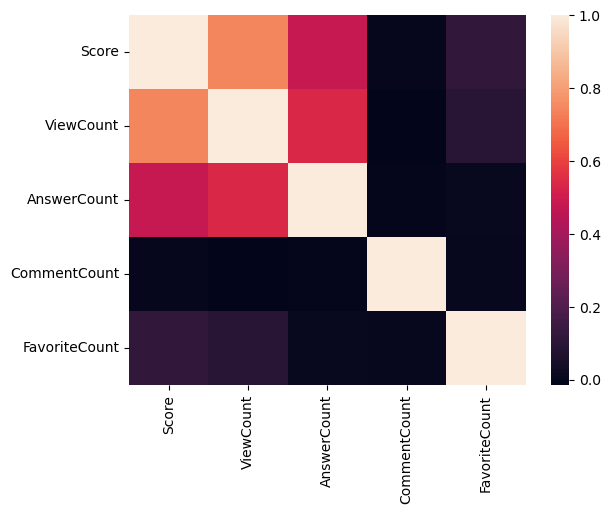

In [26]:
sns.heatmap(corr)

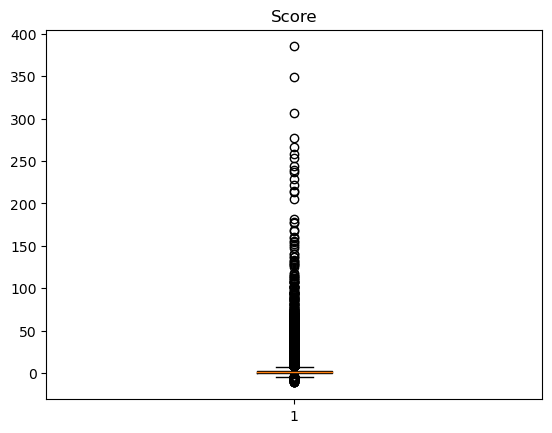

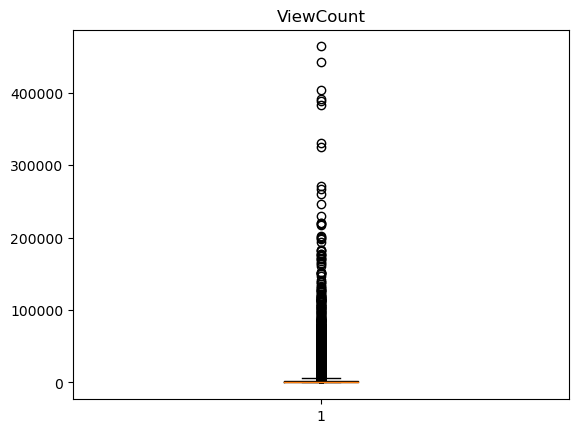

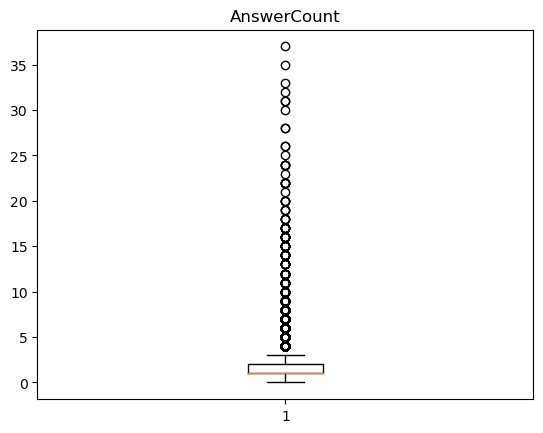

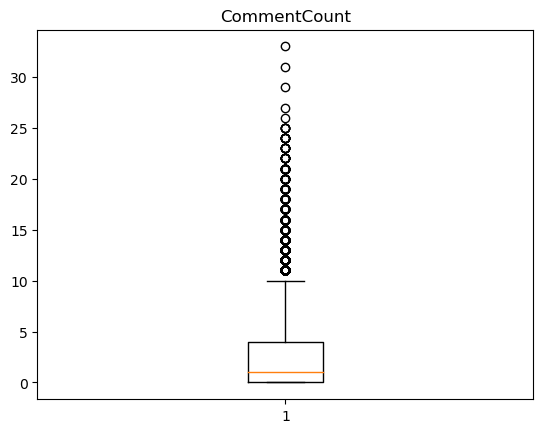

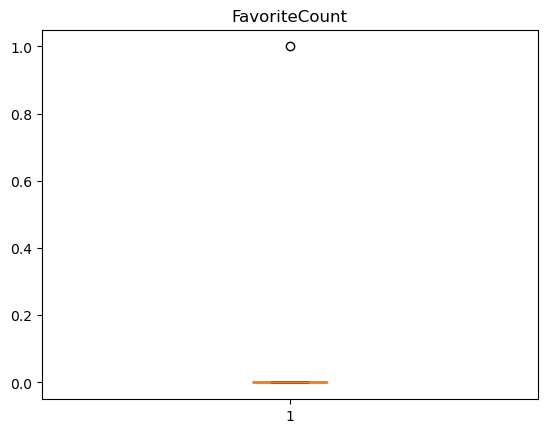

In [27]:
num_cols = data.select_dtypes(include=['float', 'int']).columns.tolist()

for col in num_cols:
    plt.figure()  
    plt.title(col)  
    plt.boxplot(data[col])
    
plt.show()

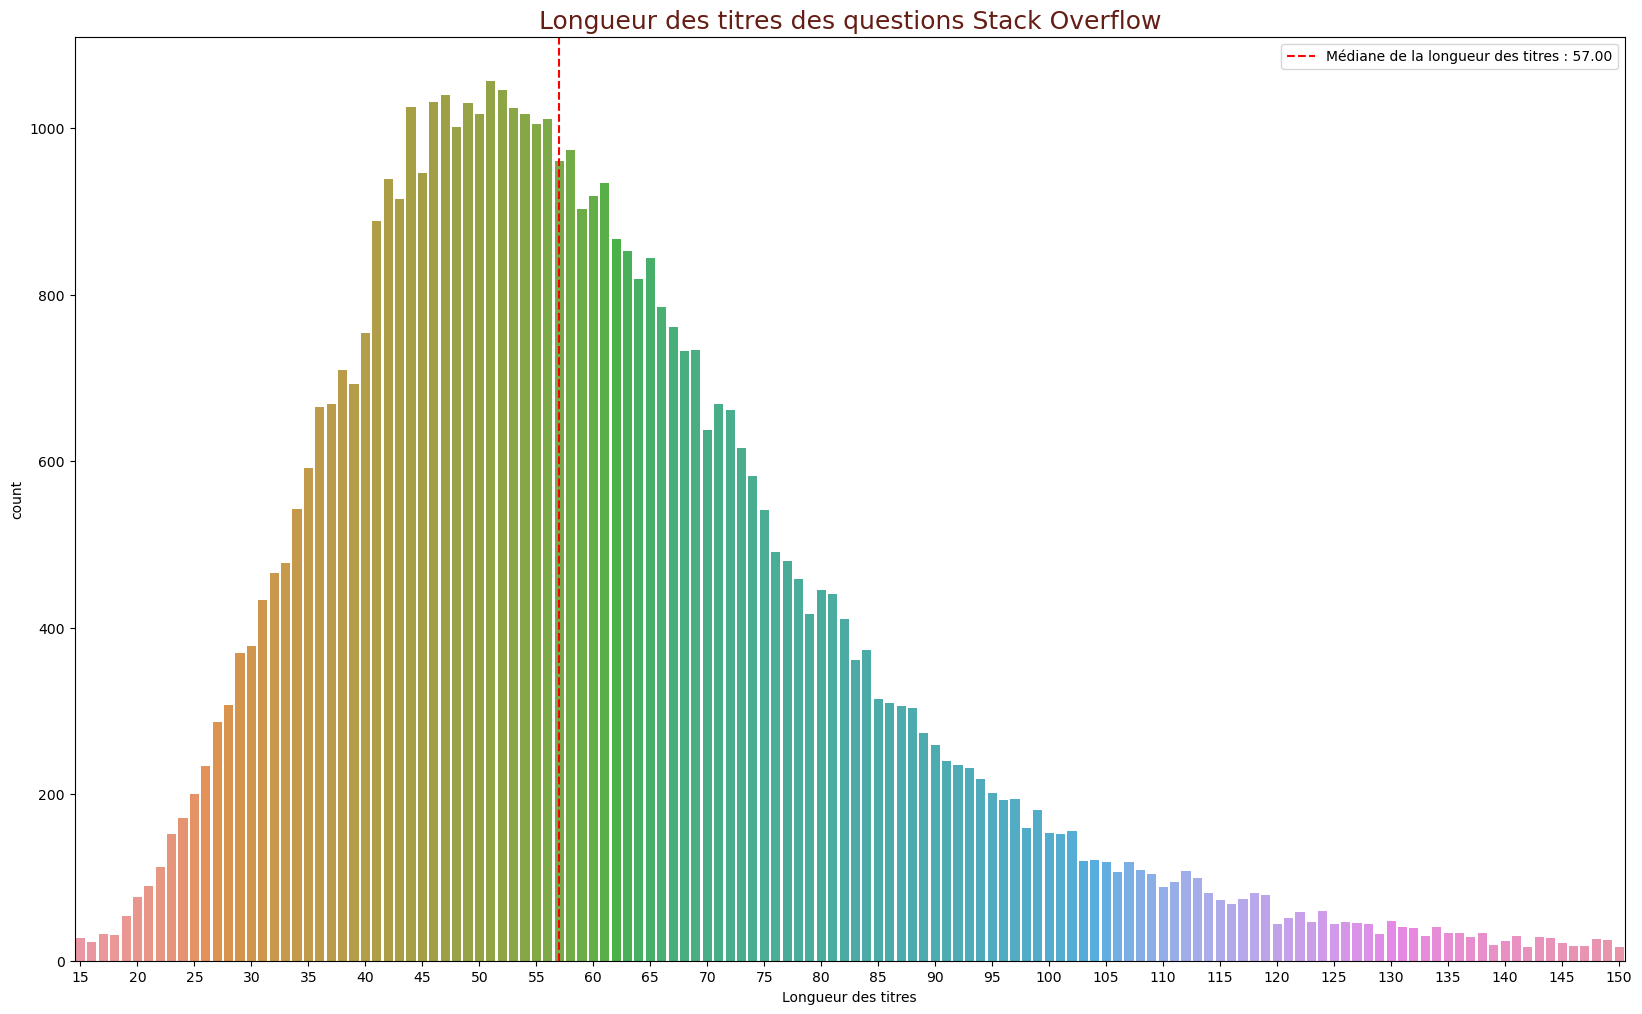

In [28]:

# Création du graphique
fig = plt.figure(figsize=(20, 12))
ax = sns.countplot(x=data.Title.str.len())

# Configuration de l'axe des abscisses
start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(0, end, 5))

# Ajout d'une ligne verticale à la position de la médiane
median_len = data.Title.str.len().median()
ax.axvline(median_len - data.Title.str.len().min(), color="r", linestyle='--',
           label=f"Médiane de la longueur des titres : {median_len:.2f}")

# Configuration des étiquettes des axes et du titre
ax.set_xlabel("Longueur des titres")
ax.set_title("Longueur des titres des questions Stack Overflow", fontsize=18, color="#641E16")
ax.legend()
plt.show()

#### Analyse des tags 

In [29]:
data['Tags'].head(3)

Id
59549222    <android><spacing><android-gridlayout>
59549242        <flutter><paypal><payment-gateway>
59549258             <python><discord><discord.py>
Name: Tags, dtype: object

In [30]:
# Remplacer les balises d'ouverture et de fermeture par une virgule dans la colonne 'Tags'
data['Tags'] = data['Tags'].str.translate(str.maketrans({'<': '', '>': ','}))

# Supprimer la dernière virgule de chaque ligne de la colonne 'Tags'
data['Tags'] = data['Tags'].str[:-1]

# Afficher les trois premières lignes de la colonne 'Tags' modifiée
print(data['Tags'].head(3))


Id
59549222    android,spacing,android-gridlayout
59549242        flutter,paypal,payment-gateway
59549258             python,discord,discord.py
Name: Tags, dtype: object


In [31]:
def count_split_tags(df, column, separator):
    """
    Cette fonction permet de diviser les différents mots contenus dans une cellule d'une série Pandas
    et de les injecter séparément dans une liste. Cela permet, par exemple, de compter les occurrences de mots.

    Paramètres
    ----------------------------------------
    df : Pandas Dataframe
        Dataframe à utiliser.
    column : string
        Colonne du dataframe à utiliser
    separator : string
        Caractère de séparation pour str.split.
    ----------------------------------------
    """
    list_words = []
    for word in df[column].str.split(separator):
        list_words.extend(word)
    df_list_words = pd.DataFrame(list_words, columns=["Tag"])
    df_list_words = df_list_words.groupby("Tag")\
        .agg(tag_count=pd.NamedAgg(column="Tag", aggfunc="count"))
    df_list_words.sort_values("tag_count", ascending=False, inplace=True)
    return df_list_words


In [32]:
tags_list = count_split_tags(df=data, column='Tags', separator=',')
print("Le jeu de données compte {} tags.".format(tags_list.shape[0]))

Le jeu de données compte 13975 tags.


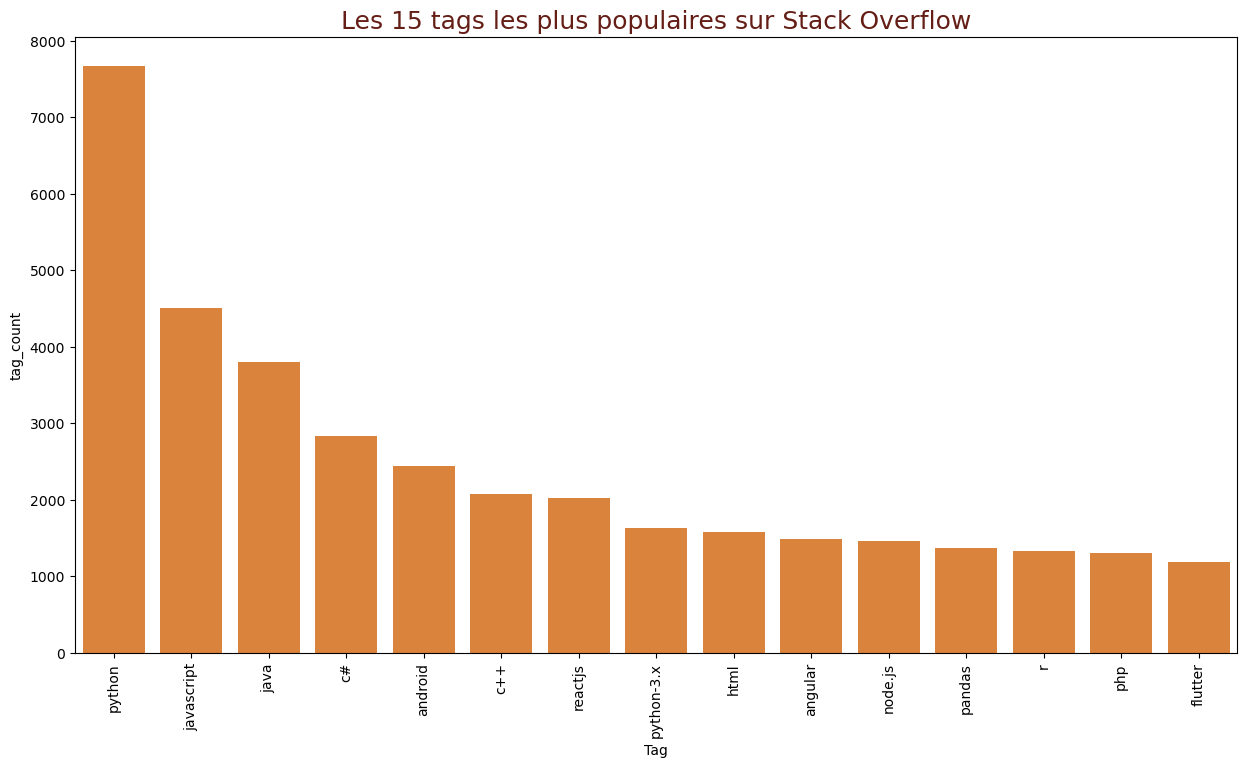

In [33]:
# Afficher les résultats des splits
fig = plt.figure(figsize=(15, 8))
sns.barplot(data=tags_list.iloc[0:15, :],
            x=tags_list.iloc[0:15, :].index,
            y="tag_count", color="#f48023")
plt.xticks(rotation=90)
plt.title("Les 15 tags les plus populaires sur Stack Overflow",
          fontsize=18, color="#641E16")

plt.show()

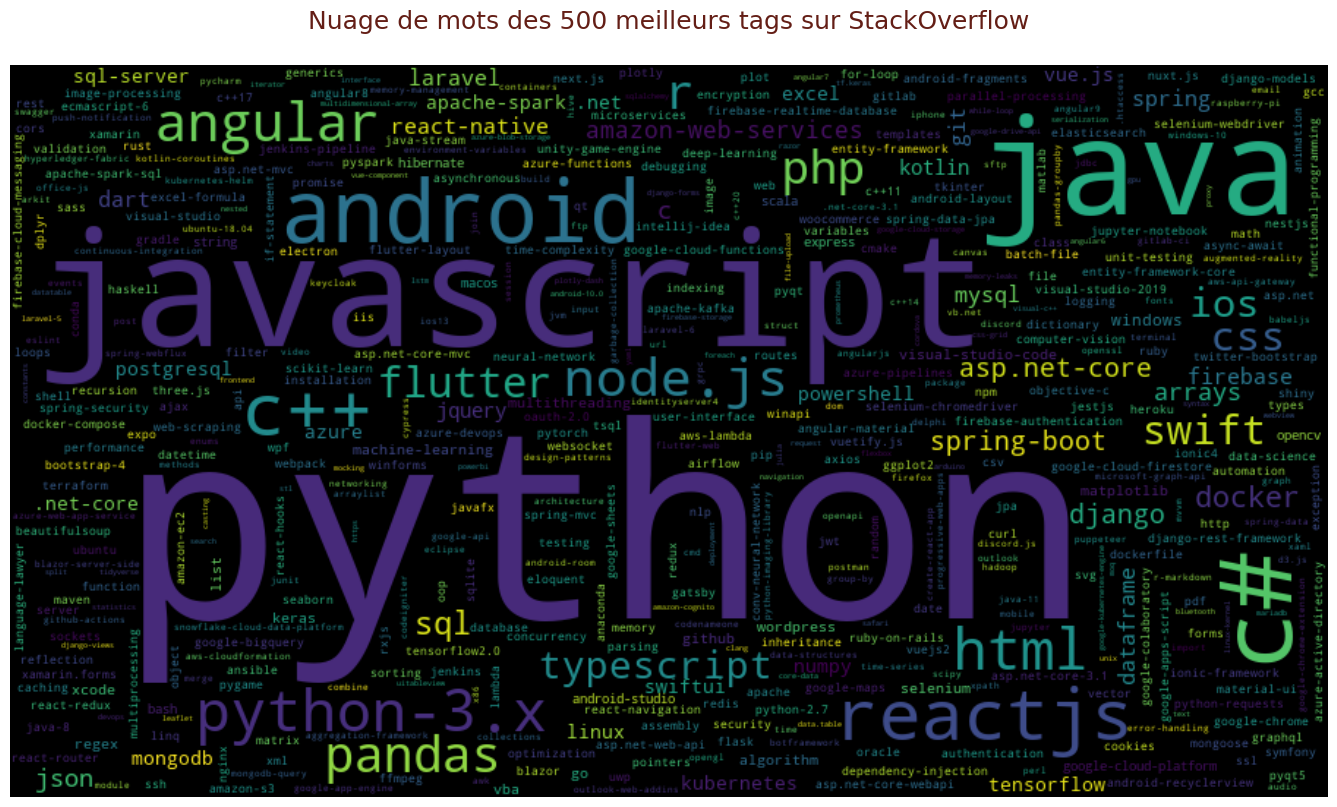

In [34]:
from wordcloud import WordCloud

# Afficher un nuage de mots à partir des fréquences de tags_list
fig = plt.figure(figsize=(17, 12))
ax = fig.add_subplot(1, 1, 1)
wordcloud = WordCloud(width=900, height=500,
                      background_color="black",
                      max_words=500, relative_scaling=1,
                      normalize_plurals=False)\
    .generate_from_frequencies(tags_list.to_dict()['tag_count'])

ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
plt.title("Nuage de mots des 500 meilleurs tags sur StackOverflow\n",
          fontsize=18, color="#641E16")
plt.show()


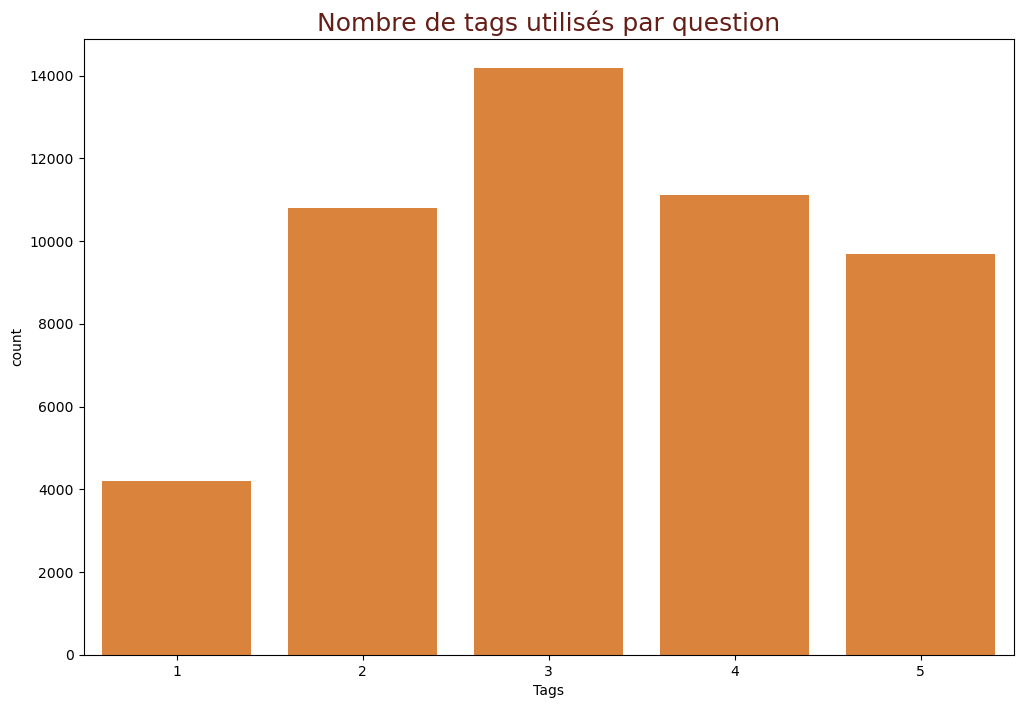

In [35]:
# Créer une liste de tags et compter leur nombre
data['Tags_list'] = data['Tags'].str.split(',')
data['Tags_count'] = data['Tags_list'].apply(lambda x: len(x))

# Tracer le résultat
fig = plt.figure(figsize=(12, 8))
ax = sns.countplot(x=data.Tags_count, color="#f48023")
ax.set_xlabel("Tags")
plt.title("Nombre de tags utilisés par question",
          fontsize=18, color="#641E16")
plt.show()


Filtrage du jeu de données avec les meilleurs Tags :

In [36]:
def filter_tag(x, top_list):
    """Comparaison des éléments de deux listes afin de vérifier si tous les tags se trouvent dans une liste de tags principaux.

    Paramètres
    ----------------------------------------
    x : liste
        Liste de tags à tester.
    ----------------------------------------
    """
    liste_temporaire = []
    for item in x:
        if item in top_list:
            #x.remove(item)
            liste_temporaire.append(item)
    return liste_temporaire

In [37]:
# Obtenir les tags principaux à partir de la liste des tags
top_tags = list(tags_list.iloc[0:15,:].index)
top_tags 

['python',
 'javascript',
 'java',
 'c#',
 'android',
 'c++',
 'reactjs',
 'python-3.x',
 'html',
 'angular',
 'node.js',
 'pandas',
 'r',
 'php',
 'flutter']

In [38]:
# Appliquer la fonction filter_tag à chaque élément de la colonne 'Tags_list' du dataframe 'data'
##data['Tags_list'] = data['Tags_list'].apply(lambda x: filter_tag(x, top_tags))
data['Tags_list'] = data['Tags_list']\
                    .apply(lambda x: filter_tag(x, top_tags))
data.head()

,CreationDate,Score,ViewCount,AnswerCount,CommentCount,FavoriteCount,Title,Body,Tags,Tags_list,Tags_count
Id,,,,,,,,,,,
59549222,2020-01-01 00:01:28,0,43,1,0,0,How to adjust Android gridlayout spacing from ...,<p>I have the following code :</p>\n\n<pre><co...,"android,spacing,android-gridlayout",[android],3
59549242,2020-01-01 00:09:38,13,19135,4,6,0,Integrating Paypal payments in Flutter app,<p>I just started on my Flutter journey and ne...,"flutter,paypal,payment-gateway",[flutter],3
59549258,2020-01-01 00:14:31,-1,53,1,2,0,My Discord XP bot isn't recognizing user data ...,<p>My bot is not working as planned.<br>\nFor ...,"python,discord,discord.py",[python],3
59549281,2020-01-01 00:23:15,3,1178,1,0,0,How to use a trait object that contains a meth...,<p>What's the correct way to use a trait objec...,rust,[],1
59549286,2020-01-01 00:24:49,2,78,1,0,0,A way for users to store selections as inputs ...,<p>I'm trying to create a way in which a user ...,"r,shiny,shiny-server,shiny-reactivity,shinyapps",[r],5


In [39]:
#mask=data['Tags_list'].apply(lambda x: x == [])
#data = data.loc[~mask]
#data.head()

In [40]:
# Obtenir les tags principaux à partir de la liste des tags
#top_tags = list(tags_list.iloc[0:15,:].index)

# Appliquer la fonction filter_tag à chaque élément de la colonne 'Tags_list' du dataframe 'data'
##data['Tags_list'] = data['Tags_list'].apply(lambda x: filter_tag(x, top_tags))
#data['Tags_list'] = data['Tags_list']\
  #                  .apply(lambda x: filter_tag(x, top_tags))

# Calculer le nombre de tags pour chaque élément de la colonne 'Tags_list' et le stocker dans une nouvelle colonne 'number_of_tags'
#data['number_of_tags'] = data['Tags_list'].apply(lambda x: len(x))

# Filtrer le dataframe pour ne garder que les éléments ayant au moins un tag
#data = data[data.number_of_tags > 0]

# Afficher la nouvelle taille du jeu de données
print("Nouvelle taille du jeu de données : {} questions.".format(data.shape[0]))


Nouvelle taille du jeu de données : 49998 questions.


In [41]:
#tags_list = count_split_tags(df=data, column='Tags', separator=',')
print("Le jeu de données compte {} tags.".format(tags_list.shape[0]))

Le jeu de données compte 13975 tags.


In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49998 entries, 59549222 to 60590553
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CreationDate   49998 non-null  object
 1   Score          49998 non-null  int64 
 2   ViewCount      49998 non-null  int64 
 3   AnswerCount    49998 non-null  int64 
 4   CommentCount   49998 non-null  int64 
 5   FavoriteCount  49998 non-null  int64 
 6   Title          49998 non-null  object
 7   Body           49998 non-null  object
 8   Tags           49998 non-null  object
 9   Tags_list      49998 non-null  object
 10  Tags_count     49998 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 4.6+ MB


### Nettoyage des questions

In [43]:
from bs4 import BeautifulSoup

def remove_code(text):
    """
    Cette fonction utilise la bibliothèque Beautifulsoup pour remplacer le contenu de 
    toutes les balises <code></code> d'un texte spécifié en paramètre.

    Parameters
    ----------
    text : str
        Chaîne de caractères à modifier.

    Returns
    -------
    str
        La chaîne de caractères modifiée.
    """
    # Convertir la chaîne de caractères en objet BeautifulSoup
    soup = BeautifulSoup(text, "lxml")
    # Trouver toutes les balises <code>
    codes = soup.find_all("code")
    # Remplacer le contenu de chaque balise par une chaîne vide
    for code in codes:
        code.string = " "
    # Retourner la chaîne de caractères modifiée
    return str(soup)


In [44]:
# Début du chronomètre
start_time = time.time()

# Supprimer les balises <code> dans le texte de la colonne 'Body'
data['Body'] = data['Body'].apply(remove_code)

# Supprimer tous les tags HTML dans le texte de la colonne 'Body'
data['Body'] = [BeautifulSoup(text,"lxml").get_text() for text in data['Body']]

# Temps d'exécution
exec_time = time.time() - start_time

# Afficher les résultats
print('-' * 50)
print("Temps d'exécution : {:.2f}s".format(exec_time))
print('-' * 50)
print(data['Body'].head(3))

--------------------------------------------------
Temps d'exécution : 60.63s
--------------------------------------------------
Id
59549222    I have the following code :\n \nIt looks like ...
59549242    I just started on my Flutter journey and need ...
59549258    My bot is not working as planned.\nFor the con...
Name: Body, dtype: object


In [45]:
def remove_pos(nlp, x, pos_list):
    """Supprime les mots d'une phrase qui correspondent à certaines catégories grammaticales.

    Paramètres
    ----------------------------------------
    nlp : objet
        Objet de traitement du langage naturel utilisé pour analyser la phrase.
    x : str
        Phrase à traiter.
    pos_list : list
        Liste des catégories grammaticales à supprimer.
    ----------------------------------------
    """
    doc = nlp(x)
    liste_texte_ligne = []
    for token in doc:
        if token.pos_ in pos_list:
            liste_texte_ligne.append(token.text)
    texte_ligne_joint = " ".join(liste_texte_ligne)
    texte_ligne_joint = texte_ligne_joint.lower().replace("c #", "c#")
    return texte_ligne_joint


In [46]:
import re

def text_cleaner(x, nlp, pos_list):
    """Fonction permettant de prétraiter les données textuelles.
       Elle permet de supprimer les espaces supplémentaires, les caractères unicode,
       les contractions anglaises, les liens, la ponctuation et les nombres.

       La bibliothèque re pour l'utilisation des expressions régulières doit être chargée au préalable.

    Paramètres
    ----------------------------------------
    x : str
        Séquence de caractères à modifier.
    ----------------------------------------
    """
    # Supprimer les POS qui ne sont pas "NOUN" ou "PROPN"
    x = remove_pos(nlp, x, pos_list)
    # Normalisation en minuscules
    x = x.lower()
    # Supprimer les caractères unicode
    x = x.encode("ascii", "ignore").decode()
    # Supprimer les contractions anglaises
    x = re.sub("\'\w+", '', x)
    # Supprimer la ponctuation sauf le # (pour C# par exemple)
    x = re.sub('[^\\w\\s#]', '', x)
    # Supprimer les liens
    x = re.sub(r'http*\S+', '', x)
    # Supprimer les nombres
    x = re.sub(r'\w*\d+\w*', '', x)
    # Supprimer les espaces supplémentaires
    x = re.sub('\s+', ' ', x)
    
    # Retourner le texte nettoyé
    return x


In [47]:
import spacy
import time
from tqdm import tqdm

# Chargement des fonctionnalités de Spacy
nlp = spacy.load('en_core_web_sm')

#, exclude=['tok2vec', 'ner', 'parser', 'attribute_ruler', 'lemmatizer'])

# en_core_web_sm

# Liste des catégories grammaticales à conserver
pos_list = ["NOUN", "PROPN"]

# Mesurer le temps d'exécution
start_time = time.time()
print('-' * 50)
print("Début du nettoyage du corps...")
print('-' * 50)
    
# Utiliser tqdm pour afficher la progression du nettoyage
tqdm.pandas()
data['Body_cleaned'] = data.Body.progress_apply(lambda x: text_cleaner(x, nlp, pos_list))

# Calculer le temps d'exécution
exec_time = time.time() - start_time
print("Temps d'exécution : {:.2f}s".format(exec_time))
print('-' * 50)
print(data['Body_cleaned'].head(3))


--------------------------------------------------
Début du nettoyage du corps...
--------------------------------------------------


100%|████████████████████████████████████████████████████████████████████████████| 49998/49998 [14:14<00:00, 58.50it/s]

Temps d'exécution : 854.68s
--------------------------------------------------
Id
59549222               code buttons buttons row space buttons
59549242    flutter journey paypal payments app flutter ap...
59549258    bot context bot youtuber tutorial algorithm ex...
Name: Body_cleaned, dtype: object


In [48]:
data

,CreationDate,Score,ViewCount,AnswerCount,CommentCount,FavoriteCount,Title,Body,Tags,Tags_list,Tags_count,Body_cleaned
Id,,,,,,,,,,,,
59549222,2020-01-01 00:01:28,0,43,1,0,0,How to adjust Android gridlayout spacing from ...,I have the following code :\n \nIt looks like ...,"android,spacing,android-gridlayout",[android],3,code buttons buttons row space buttons
59549242,2020-01-01 00:09:38,13,19135,4,6,0,Integrating Paypal payments in Flutter app,I just started on my Flutter journey and need ...,"flutter,paypal,payment-gateway",[flutter],3,flutter journey paypal payments app flutter ap...
59549258,2020-01-01 00:14:31,-1,53,1,2,0,My Discord XP bot isn't recognizing user data ...,My bot is not working as planned.\nFor the con...,"python,discord,discord.py",[python],3,bot context bot youtuber tutorial algorithm ex...
59549281,2020-01-01 00:23:15,3,1178,1,0,0,How to use a trait object that contains a meth...,What's the correct way to use a trait object t...,rust,[],1,way trait object method reference code compile...
59549286,2020-01-01 00:24:49,2,78,1,0,0,A way for users to store selections as inputs ...,I'm trying to create a way in which a user can...,"r,shiny,shiny-server,shiny-reactivity,shinyapps",[r],5,way user selections inputs example app table r...
...,...,...,...,...,...,...,...,...,...,...,...,...
60590467,2020-03-08 18:00:46,1,292,1,0,0,Content inside Picker overlaps when the font s...,\nI am creating a Picker for selecting number...,"ios,swiftui,watchkit,font-size,picker",[],5,picker numbers watchkit size numbers picker co...
60590468,2020-03-08 18:00:54,4,6932,2,2,0,API key not valid firebase auth,I've had used a firebase account for my androi...,"android,firebase,firebase-authentication",[android],3,firebase account project issues account one pr...
60590470,2020-03-08 18:01:15,2,947,1,1,0,WebRTC encryption mechanism of SRTP,WebRTC uses DTLS for encryption of SCTP (data)...,"webrtc,gstreamer,rtp",[],3,webrtc dtls encryption sctp data dtls exchange...


### Tockenisation

In [49]:
import nltk
from nltk.corpus import stopwords


start_time = time.time()
# Tockenization
data['Body_cleaned'] = data.Body_cleaned.apply(nltk.tokenize.word_tokenize)

# List of stop words in "EN" from NLTK
stop_words = stopwords.words("english")

# Remove stop words
data['Body_cleaned'] = data.Body_cleaned\
    .apply(lambda x : [word for word in x
                       if word not in stop_words
                       and len(word)>2])
exec_time = time.time() - start_time
print('-' * 50)
print("Execution time : {:.2f}s".format(exec_time))
print('-' * 50)
print(data['Body_cleaned'].head(3))

--------------------------------------------------
Execution time : 9.21s
--------------------------------------------------
Id
59549222        [code, buttons, buttons, row, space, buttons]
59549242    [flutter, journey, paypal, payments, app, flut...
59549258    [bot, context, bot, youtuber, tutorial, algori...
Name: Body_cleaned, dtype: object


### Lemmatisation

In [50]:
import time
from nltk.stem import WordNetLemmatizer

# Création d'une instance du lemmeur WordNetLemmatizer
wn = WordNetLemmatizer()

# Mesure du temps d'exécution
start_time = time.time()

# Application du lemmeur sur chaque liste de mots dans la colonne "Body_cleaned"
data['Body_cleaned'] = data.Body_cleaned\
    .apply(lambda x : [wn.lemmatize(word) for word in x])

# Calcul du temps d'exécution
exec_time = time.time() - start_time

# Affichage du temps d'exécution
print('-' * 50)
print("Temps d'exécution : {:.2f}s".format(exec_time))
print('-' * 50)

# Affichage des trois premières lignes de la colonne "Body_cleaned" après le lemmeur
print(data['Body_cleaned'].head(3))

--------------------------------------------------
Temps d'exécution : 5.51s
--------------------------------------------------
Id
59549222           [code, button, button, row, space, button]
59549242    [flutter, journey, paypal, payment, app, flutt...
59549258    [bot, context, bot, youtuber, tutorial, algori...
Name: Body_cleaned, dtype: object


### Racinisation(ou stemming)

In [51]:
import time
from nltk.stem import PorterStemmer

# Création d'une instance du stemmeur PorterStemmer
stemmer = PorterStemmer()

# Mesure du temps d'exécution
start_time = time.time()

# Application du stemmeur sur chaque liste de mots dans la colonne "Body_cleaned"
data['Body_cleaned'] = data['Body_cleaned'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x]))

# Calcul du temps d'exécution
exec_time = time.time() - start_time

# Affichage du temps d'exécution
print('-' * 50)
print("Temps d'exécution : {:.2f}s".format(exec_time))
print('-' * 50)

# Affichage des trois premières lignes de la colonne "Body_cleaned" après le stemmeur
print(data['Body_cleaned'].head(3))

--------------------------------------------------
Temps d'exécution : 22.29s
--------------------------------------------------
Id
59549222                  code button button row space button
59549242    flutter journey paypal payment app flutter api...
59549258    bot context bot youtub tutori algorithm experi...
Name: Body_cleaned, dtype: object


In [52]:
data['Body_cleaned']

Id
59549222                  code button button row space button
59549242    flutter journey paypal payment app flutter api...
59549258    bot context bot youtub tutori algorithm experi...
59549281    way trait object method refer code compil erro...
59549286    way user select input exampl app tabl row butt...
                                  ...                        
60590467    picker number watchkit size number picker cont...
60590468    firebas account project issu account one proje...
60590470    webrtc dtl encrypt sctp data dtl exchang srtp ...
60590474    featur custom tenant subdomain site thiercompa...
60590553    exampl sign button page contend div input regi...
Name: Body_cleaned, Length: 49998, dtype: object

## Nettoyage des titres

In [53]:
def text_cleaner(x, nlp, pos_list, lang="english"):
    """Fonction permettant de prétraiter les données textuelles.
        Elle permet de supprimer les espaces supplémentaires, les caractères Unicode,
        les contractions anglaises, les liens, la ponctuation et les nombres.
        
        La librairie re pour utiliser les expressions régulières doit être chargée au préalable.
        Les librairies SpaCy et NLTK doivent également être chargées.

    Paramètres
    ----------------------------------------
    x : str
        Chaîne de caractères à modifier.
    nlp : objet
        Objet SpaCy initialisé pour effectuer le prétraitement.
    pos_list : liste
        Liste des étiquettes de parties du discours (POS) à conserver.
    lang : str, optionnel
        Langue utilisée pour les stop words (par défaut : "english").
    ----------------------------------------
    """
    # Supprimer les POS qui ne sont pas "NOUN" ou "PROPN"
    x = remove_pos(nlp, x, pos_list)
    # Normalisation en minuscules
    x = x.lower()
    # Supprimer les caractères Unicode
    x = x.encode("ascii", "ignore").decode()
    # Supprimer les contractions anglaises
    x = re.sub("\'\w+", '', x)
    # Supprimer la ponctuation sauf "#" (pour C# par exemple)
    x = re.sub('[^\\w\\s#]', '', x)
    # Supprimer les liens
    x = re.sub(r'http*\S+', '', x)
    # Supprimer les nombres
    x = re.sub(r'\w*\d+\w*', '', x)
    # Supprimer les espaces supplémentaires
    x = re.sub('\s+', ' ', x)
        
    # Tokenisation
    x = nltk.tokenize.word_tokenize(x)
    # Liste des stop words dans la langue sélectionnée à partir de NLTK
    stop_words = stopwords.words(lang)
    # Supprimer les stop words
    x = [word for word in x if word not in stop_words 
         and len(word)>2]
    # Lemmatisation
    wn = nltk.WordNetLemmatizer()
    x = [wn.lemmatize(word) for word in x]
    
    # Retourner le texte nettoyé
    return x


In [54]:
# Chargement des fonctionnalités de Spacy
nlp = spacy.load('en_core_web_sm')

####, exclude=['tok2vec', 'ner', 'parser', 
                        ##        'attribute_ruler', 'lemmatizer'])
pos_list = ["NOUN","PROPN"]
# Application du nettoyeur complet sur la colonne "Title"
print('-' * 50)
print("Début du nettoyage des titres...")
print('-' * 50)
start_time = time.time()
data['Title_cleaned'] = data.Title\
                            .progress_apply(lambda x: 
                                            text_cleaner(x,
                                                         nlp,
                                                         pos_list,
                                                         "english"))
exec_time = time.time() - start_time
print("Temps d'exécution : {:.2f}s".format(exec_time))
print('-' * 50)
print(data['Title_cleaned'].head(3))


--------------------------------------------------
Début du nettoyage des titres...
--------------------------------------------------


100%|███████████████████████████████████████████████████████████████████████████| 49998/49998 [04:24<00:00, 189.30it/s]

Temps d'exécution : 264.12s
--------------------------------------------------
Id
59549222    [android, gridlayout, java, program]
59549242         [paypal, payment, flutter, app]
59549258        [discord, bot, user, data, file]
Name: Title_cleaned, dtype: object


In [55]:
# Supprimer les éléments avec un nombre de tokens Body < 3
data['body_tokens_count'] = [len(_) for _ in data.Body_cleaned]
data['Title_tokens_count'] = [len(_) for _ in data.Title_cleaned]
data = data[(data.body_tokens_count >= 5) & (data.Title_tokens_count > 0)]
# Supprimer les features calculées
#data = data[['Title_cleaned',
#             'Body_cleaned',
#             'Score',
#             'Tags_list']]
# Renommer les colonnes
#data = data.rename(columns={'Title_cleaned': 'Title',
#                            'Body_cleaned': 'Body',
#                            'Tags_list': 'Tags'})

data.head(3)


,Title,Body,Score,Tags
Id,,,,
59549222,"[android, gridlayout, java, program]",code button button row space button,0,[android]
59549242,"[paypal, payment, flutter, app]",flutter journey paypal payment app flutter api...,13,[flutter]
59549258,"[discord, bot, user, data, file]",bot context bot youtub tutori algorithm experi...,-1,[python]


In [56]:
data.to_csv("QueryResults_config2_cleaned_Bis2.csv", sep=";")

# open a file, where you ant to store the data
#file = open('./data/QueryResults_config2_cleaned', 'wb')

# dump information to that file
#import pickle
#pickle.dump(data, file)